In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.animation as animation
import random 

def checkSum(indexes, gameSpace, boardSize):
    sums = []
    for index in indexes:
        sum = 0
        idx = index[0] 
        idy = index[1]  
        
        #sum = gameSpace[idx][idy] + sum 
        sum =  gameSpace[idx % boardSize][(idy-1) % boardSize] + sum
        sum =  gameSpace[idx % boardSize][(idy+1) % boardSize] + sum
        sum =  gameSpace[(idx-1) % boardSize][idy % boardSize] + sum
        sum =  gameSpace[(idx+1) % boardSize][idy % boardSize] + sum
        sum =  gameSpace[(idx-1) % boardSize][(idy-1) % boardSize] + sum
        sum =  gameSpace[(idx+1) % boardSize][(idy+1) % boardSize] + sum
        sum =  gameSpace[(idx-1) % boardSize][(idy+1) % boardSize] + sum
        sum =  gameSpace[(idx+1) % boardSize][(idy-1) % boardSize] + sum

        sums.append(sum)
        
    #print(np.array(sums).reshape(16,16))
    return sums
def lifedensity(pAlive, gameSpace):
    for i in range(gameSpace.shape[0]):
        for j in range(gameSpace.shape[1]):
            rand = random.randint(0, 100)
            if(rand<=pAlive):
                gameSpace[i][j] = 1
    return gameSpace
def densitychecker(gameSpace):
    totalsquares = gameSpace.shape[0] * gameSpace.shape[1]
    alive = 0
    for i in range(gameSpace.shape[0]):
        for j in range(gameSpace.shape[1]):
            alive = alive + gameSpace[i][j]
    return (alive/totalsquares)
            

In [2]:
file = "Testcase1.txt"
startingBoard = np.loadtxt(file, dtype = np.int8)
startingBoard = lifedensity(50, startingBoard)
print(startingBoard.shape)

(32, 32)


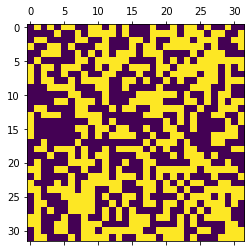

MovieWriter imagemagick unavailable; using Pillow instead.


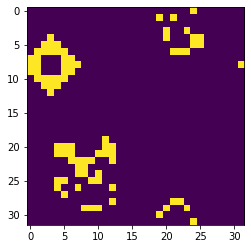

In [3]:
global gameSpace


def animate(frame):
    state = updateGame(gameSpace)

    plt.imshow(gameSpace)

def updateGame(gameSpace):
    checker = checkSum(board_Indexes, gameSpace, gameSpace.shape[0])
    densities.append(densitychecker(gameSpace))
    
    for i in range(gameSpace.shape[0] * gameSpace.shape[0]):
        if(checker[i] < 2):
            gameSpace[board_Indexes[i][0]][board_Indexes[i][1]] = 0
            
        if(checker[i] == 3):
            gameSpace[board_Indexes[i][0]][board_Indexes[i][1]] = 1 
        
        if(checker[i] > 3):
            gameSpace[board_Indexes[i][0]][board_Indexes[i][1]] = 0
    mat.set_data(gameSpace)
    return [mat]
    
densities = []
times = 0
gameSpace = np.zeros((startingBoard.shape[0],startingBoard.shape[0]), dtype = np.int8)
board_Indexes = np.argwhere(gameSpace == 0)
gameSpace = startingBoard

                           
fig, ax = plt.subplots()
mat = ax.matshow(gameSpace)
anim = animation.FuncAnimation(fig, animate, frames=100, interval=250)
plt.show()
anim.save('P7032x32.gif', dpi=80, writer='imagemagick')
#print(gameSpace)

ValueError: x and y must have same first dimension, but have shapes (50,) and (101,)

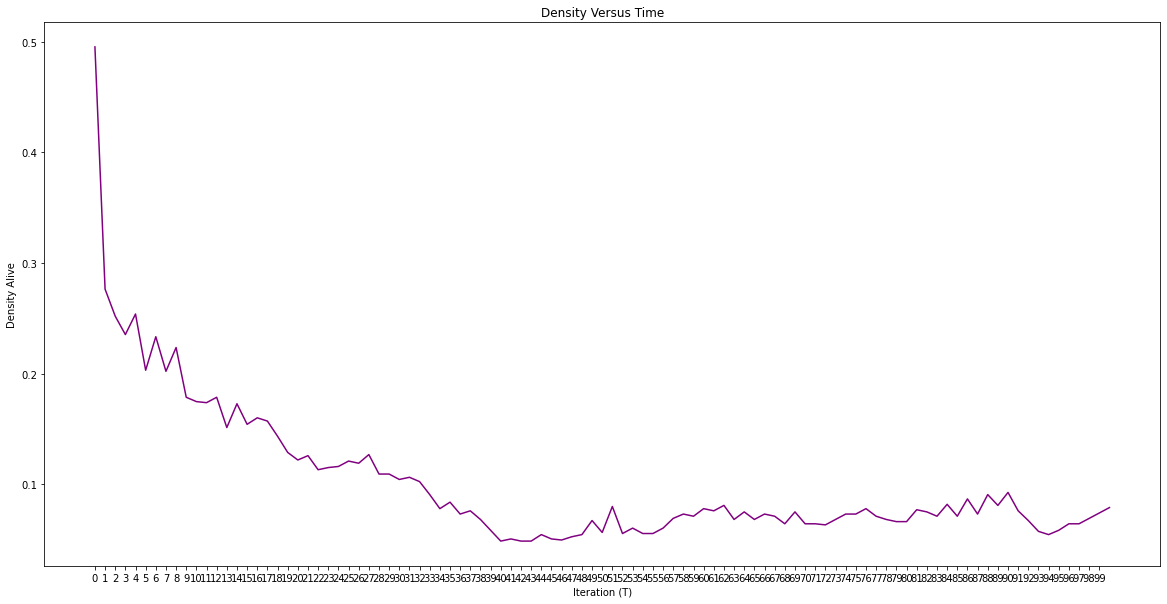

In [4]:
from matplotlib.pyplot import figure


x = np.linspace(0,100)
y = densities


plt.figure(figsize=(20,10))
plt.xlabel("Iteration (T)")
plt.ylabel("Density Alive")
plt.title("Density Versus Time")
plt.plot(y,color="purple")
plt.xticks(np.arange(0, 100, 1))
plt.plot(x,y)